## Step 1: Setting Up Your SQLite Database
- Initialize SQLite in Google Colab.
- Create a database named superhero_db.sqlite.
- Define the database schema, ensuring it includes the following tables:
  - heroes: Stores superhero names, powers, and teams.
  - villains: Stores villains and their evil plans.
  - battles: Tracks battles between heroes and villains, including the outcome.
- Implement primary keys and foreign keys where appropriate.

In [9]:
import sqlite3
import pandas as pd


# connect to "superhero_db" database
connection = sqlite3.connect("superhero_db.sqlite")

# create table for all heroes, villains, and battles + drop old tables (from re-running cell)
create_tables_script = """
    DROP TABLE IF EXISTS Battles;
    DROP TABLE IF EXISTS Heroes;
    DROP TABLE IF EXISTS Villains;

    CREATE TABLE Battles(
      id INT PRIMARY KEY,
      hero_id INT,
      villain_id INT,
      outcome TEXT,
      FOREIGN KEY (hero_id) REFERENCES Heroes(id),
      FOREIGN KEY (villain_id) REFERENCES Villains(id)
    );

    CREATE TABLE Heroes(
      id INT PRIMARY KEY,
      name TEXT,
      power TEXT,
      team TEXT
    );

    CREATE TABLE Villains(
      id INT PRIMARY KEY,
      name TEXT,
      evil_plan TEXT
    );
    """

# commit tables to db
cursor = connection.cursor()
cursor.executescript(create_tables_script)
connection.commit()

## verify tables correctly created
# battles
print("----------")
show_tables_script = "PRAGMA table_info(Battles);"
cursor.execute(show_tables_script)
for column in cursor.fetchall():
    print(column)
print("----------")
# heros
show_tables_script = "PRAGMA table_info(Heroes);"
cursor.execute(show_tables_script)
for column in cursor.fetchall():
    print(column)
# villains
print("----------")
show_tables_script = "PRAGMA table_info(Villains);"
cursor.execute(show_tables_script)
for column in cursor.fetchall():
    print(column)
print("----------")
cursor.close()


----------
(0, 'id', 'INT', 0, None, 1)
(1, 'hero_id', 'INT', 0, None, 0)
(2, 'villain_id', 'INT', 0, None, 0)
(3, 'outcome', 'TEXT', 0, None, 0)
----------
(0, 'id', 'INT', 0, None, 1)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'power', 'TEXT', 0, None, 0)
(3, 'team', 'TEXT', 0, None, 0)
----------
(0, 'id', 'INT', 0, None, 1)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'evil_plan', 'TEXT', 0, None, 0)
----------


## Step 2: Import Data from CSV Files
- Download the provided CSV files.
- pload them to Google Colab.
- Write a script to import data from these files into the appropriate tables.
- Verify that the data has been successfully inserted.

In [10]:
# read in battles, heroes, and villains csv's
battles_df = pd.read_csv("/content/battles.csv")
heroes_df = pd.read_csv("/content/heroes.csv")
villains_df = pd.read_csv("/content/villains.csv")

# verify data has been correctly read in
print("--------")
print(battles_df.head())
print("--------")
print(heroes_df.head())
print("--------")
print(villains_df.head())
print("--------")

## insert data into db via pandas
battles_df.to_sql("Battles", connection, if_exists="replace", index=False)
heroes_df.to_sql("Heroes", connection, if_exists="replace", index=False)
villains_df.to_sql("Villains", connection, if_exists="replace", index=False)
connection.commit()

# verify inserts
print("--------")
new_battles_df = pd.read_sql_query("SELECT * FROM Battles", connection)
print(new_battles_df.head())
print("--------")
new_heroes_df = pd.read_sql_query("SELECT * FROM Heroes", connection)
print(new_heroes_df.head())
print("--------")
new_villains_df = pd.read_sql_query("SELECT * FROM Villains", connection)
print(new_villains_df.head())
print("--------")

--------
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins
--------
   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
--------
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
--------
--------
   id  hero_id  villain_id       outcome
0   1        1      

## Step 3: Querying the Database
- Retrieve all superheroes and their powers
- Find all battles where the hero won
- List all villains and their evil plans
- Determine which superhero has fought the most battles

In [11]:
cursor = connection.cursor()


print("--------")
# Get all superheroes and powers
get_all_heroes_and_powers = """
  SELECT name, power
    FROM Heroes;
"""
# verify results
cursor.execute(get_all_heroes_and_powers)
for each in cursor.fetchall():
    print(each)
print("--------")


# Find all battles where the hero won
get_all_heroes_wins = """
  SELECT Heroes.name
    FROM Heroes
    INNER JOIN Battles ON
      Heroes.id = Battles.hero_id
    WHERE outcome = "Hero Wins";
"""
# verify results
cursor.execute(get_all_heroes_wins)
for each in cursor.fetchall():
    print(each)
print("--------")


# List all villains and their evil plans
get_villains_and_plans = """
  SELECT name, evil_plan
    FROM Villains;
"""
# verify results
cursor.execute(get_villains_and_plans)
for each in cursor.fetchall():
    print(each)
print("--------")


# Determine which superhero has fought the most battles
get_best_hero = """
  SELECT name
    FROM Heroes
    INNER JOIN Battles
      ON Heroes.id = Battles.hero_id
    WHERE outcome = "Hero Wins"
    GROUP BY name
    LIMIT 1;
"""
# verify results
cursor.execute(get_best_hero)
for each in cursor.fetchall():
    print(each)
print("--------")


cursor.close()

--------
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')
--------
('Hulk',)
('Spider-Man',)
('Hulk',)
('Batman',)
('Black Panther',)
('The Flash',)
('Batman',)
('Batman',)
('Thor',)
--------
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')
--------
('Batman',)
--------


## Step 4: Add a Custom Feature
- Design and implement an additional table related to superheroes or villains.
- Populate it with data.
- Write at least one query to retrieve meaningful insights from the new table.
### Feature...
- Hero sidekicks

In [12]:
# Ensure that the new table and queries function correctly.
cursor = connection.cursor()

# create new table
create_sidekick_table = """
    DROP TABLE IF EXISTS Sidekicks;

    CREATE TABLE Sidekicks(
      id INT PRIMARY KEY,
      main_hero_id INT,
      name TEXT,
      power TEXT,
      FOREIGN KEY (main_hero_id) REFERENCES Heroes(id)
    );
    """
cursor.executescript(create_sidekick_table)
connection.commit()

# verify table was correctly created
print("----------")
show_table_script = "PRAGMA table_info(Sidekicks);"
cursor.execute(show_table_script)
for column in cursor.fetchall():
    print(column)
print("----------")

# insert sidekicks
sidekicks = [
    (1, 3, "Robin",	"expert acrobat"),
    (2, 5, "Loki", "trickster god"),
    (3, 9, "Hulk Jr", "super strength"),
    (4, 10, "Cloak", "magic")
]
cursor.executemany("""
    INSERT INTO Sidekicks
      (id, main_hero_id, name, power)
    VALUES (?, ?, ?, ?)
  """, sidekicks)
connection.commit()

# verify inserts
sidekicks_df = pd.read_sql_query("SELECT * FROM Sidekicks", connection)
print(sidekicks_df.head())
print("--------")

# query: list all side kicks and their main hero
get_sidekicks_and_heroes = """
  SELECT Sidekicks.name, Heroes.name
    FROM Sidekicks
    INNER JOIN Heroes
      ON Heroes.id = Sidekicks.main_hero_id
"""
cursor.execute(get_sidekicks_and_heroes)
for each in cursor.fetchall():
    print(each)

cursor.close()

----------
(0, 'id', 'INT', 0, None, 1)
(1, 'main_hero_id', 'INT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'power', 'TEXT', 0, None, 0)
----------
   id  main_hero_id     name           power
0   1             3    Robin  expert acrobat
1   2             5     Loki   trickster god
2   3             9  Hulk Jr  super strength
3   4            10    Cloak           magic
--------
('Robin', 'Batman')
('Loki', 'Thor')
('Hulk Jr', 'Hulk')
('Cloak', 'Doctor Strange')


## Bonus Challenge
- Enhance your project by adding a visual or interactive component
- Looking at what heroes won, tied, and lost the most

-----------
            name  wins_count
0         Batman           3
1  Black Panther           1
2           Hulk           2
3     Spider-Man           1
4      The Flash           1
5           Thor           1
-----------
           name  loses_count
0      Iron Man            1
1    Spider-Man            3
2      Superman            1
3     The Flash            1
4          Thor            1
5  Wonder Woman            1
-----------
             name  draws_count
0          Batman            4
1  Doctor Strange            1
2        Iron Man            2
3        Superman            1
4       The Flash            4
5    Wonder Woman            1
-----------


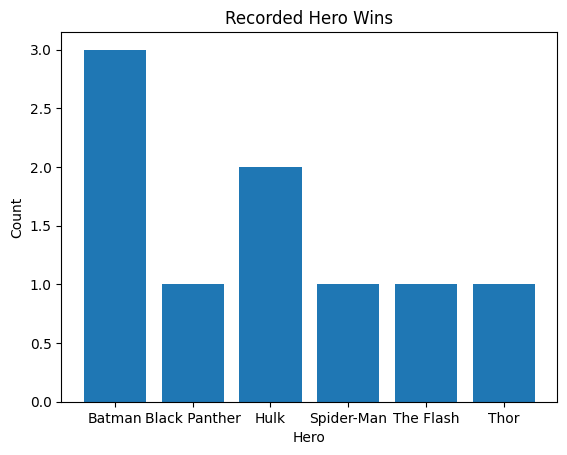

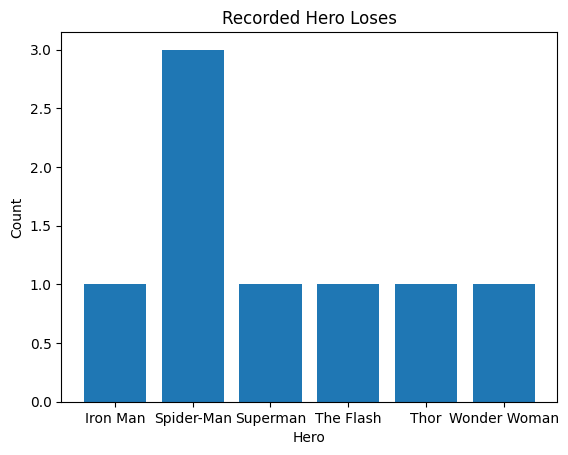

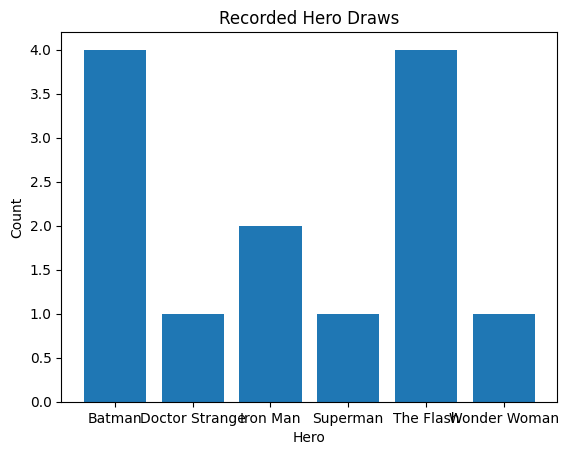

In [20]:
import matplotlib.pyplot as plt

cursor = connection.cursor()

print("-----------")
## read in relavent data via pandas and sqlite queries
# wins
battles_wins_df = pd.read_sql_query(
  """
  SELECT Heroes.name, COUNT(Heroes.name) AS wins_count
    FROM Battles
    INNER JOIN Heroes
      ON Heroes.id = Battles.hero_id
    WHERE Battles.outcome = "Hero Wins"
    GROUP BY Heroes.name
  """
  , connection)
# verify query worked as intended
print(battles_wins_df)
print("-----------")

# loses
battles_loses_df = pd.read_sql_query(
  """
  SELECT Heroes.name, COUNT(Heroes.name) AS loses_count
    FROM Battles
    INNER JOIN Heroes
      ON Heroes.id = Battles.hero_id
    WHERE Battles.outcome = "Villain Wins"
    GROUP BY Heroes.name
  """
  , connection)
# verify query worked as intended
print(battles_loses_df)
print("-----------")

# draws
battles_draws_df = pd.read_sql_query(
  """
  SELECT Heroes.name, COUNT(Heroes.name) AS draws_count
    FROM Battles
    INNER JOIN Heroes
      ON Heroes.id = Battles.hero_id
    WHERE Battles.outcome = "Draw"
    GROUP BY Heroes.name
  """
  , connection)
# verify query worked as intended
print(battles_draws_df)
print("-----------")

## plot wins, draws, and loses
# wins
plt.bar(battles_wins_df["name"], battles_wins_df["wins_count"] )
plt.xlabel("Hero")
plt.ylabel("Count")
plt.title("Recorded Hero Wins")
plt.show()

# loses
plt.bar(battles_loses_df["name"], battles_loses_df["loses_count"] )
plt.xlabel("Hero")
plt.ylabel("Count")
plt.title("Recorded Hero Loses")
plt.show()

# draws
plt.bar(battles_draws_df["name"], battles_draws_df["draws_count"] )
plt.xlabel("Hero")
plt.ylabel("Count")
plt.title("Recorded Hero Draws")
plt.show()

## Conclusions
# Batman's got the most wins
# Spider-Man's got most loses
# The Flash and Batman got a lot of ties